In [23]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings('ignore')

In [24]:
gdf = gpd.read_file("/quads3310-20131231.shp")

print(gdf.head())

       ID  SPECIES_ID  QUAD_ID                  SPECIES          QUAD_NAME  \
0  552874         101      514  Zantedeschia aethiopica       CALNEVA LAKE   
1  552875         101      639  Zantedeschia aethiopica            CALPINE   
2  552876         101     2319  Zantedeschia aethiopica       CALUMET MINE   
3  552877         101     2360  Zantedeschia aethiopica  CALUMET MOUNTAINS   
4  552878         101     1748  Zantedeschia aethiopica    CALVADA SPRINGS   

   ABUNDANCE  SPREAD                  ABUNSPREAD   MANAGEMENT        DATE  \
0          0       0  Suspected absent from quad  not managed  2011-06-27   
1          0       0  Suspected absent from quad  not managed  2011-06-27   
2          0       0  Suspected absent from quad  not managed  2011-09-13   
3          0       0  Suspected absent from quad  not managed  2011-09-13   
4          0       0  Suspected absent from quad  not managed  2011-06-30   

  SOURCE                                         PARTICIPAN OBS_NOTE

In [47]:
weeds = gdf[['ID', 'SPECIES', 'SPECIES_ID', 'QUAD_ID', 'ABUNDANCE',
       'SPREAD', 'DATE', 'geometry']]

weeds = weeds[weeds['ABUNDANCE'] != 9] #Remove species which couldn't be properly identified

print(f"Num Species: {len(list(set(weeds['SPECIES_ID'])))}, Num Reigons: {len(list(set(weeds['QUAD_ID'])))}")

0         Zantedeschia aethiopica
1         Zantedeschia aethiopica
2         Zantedeschia aethiopica
3         Zantedeschia aethiopica
4         Zantedeschia aethiopica
                   ...           
555343    Zantedeschia aethiopica
555344    Zantedeschia aethiopica
555345    Zantedeschia aethiopica
555346    Zantedeschia aethiopica
555347    Zantedeschia aethiopica
Name: SPECIES, Length: 555348, dtype: object
Num Species: 265, Num Reigons: 2856


Text(0.5, 1.0, 'Species Distribution Across Quads')

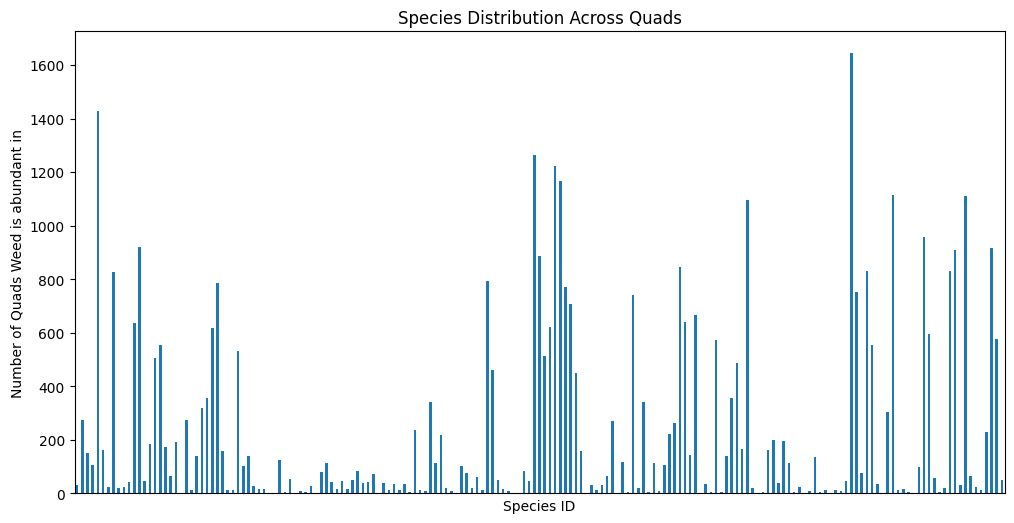

In [42]:
# Group by species_id and count number of unique quad_ids
species_quad = weeds[weeds["ABUNDANCE"] > 1].groupby("SPECIES_ID")["QUAD_ID"].nunique()

# Plot bar chart
plt.figure(figsize=(12, 6))
species_quad.plot(kind="bar")
plt.xticks([], [])
plt.xlabel("Species ID")
plt.ylabel("Number of Quads Weed is abundant in")
# plt.yscale("log")
plt.title("Species Distribution Across Quads")

In [43]:
california = gpd.read_file("/CA_State.shp")
california = california.to_crs(epsg = 3857)
fires = gpd.read_file("/Perimeters.shp")
fires = fires[fires.is_valid]
fires = fires.to_crs(epsg = 3857)

0         Zantedeschia aethiopica
1         Zantedeschia aethiopica
2         Zantedeschia aethiopica
3         Zantedeschia aethiopica
4         Zantedeschia aethiopica
                   ...           
555343    Zantedeschia aethiopica
555344    Zantedeschia aethiopica
555345    Zantedeschia aethiopica
555346    Zantedeschia aethiopica
555347    Zantedeschia aethiopica
Name: SPECIES, Length: 543954, dtype: object


<Axes: >

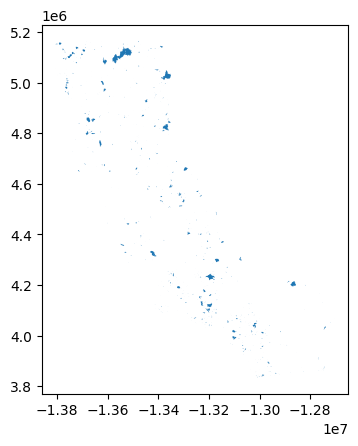

In [48]:
intersection = gpd.sjoin(fires, california, how='inner')
intersection.plot()

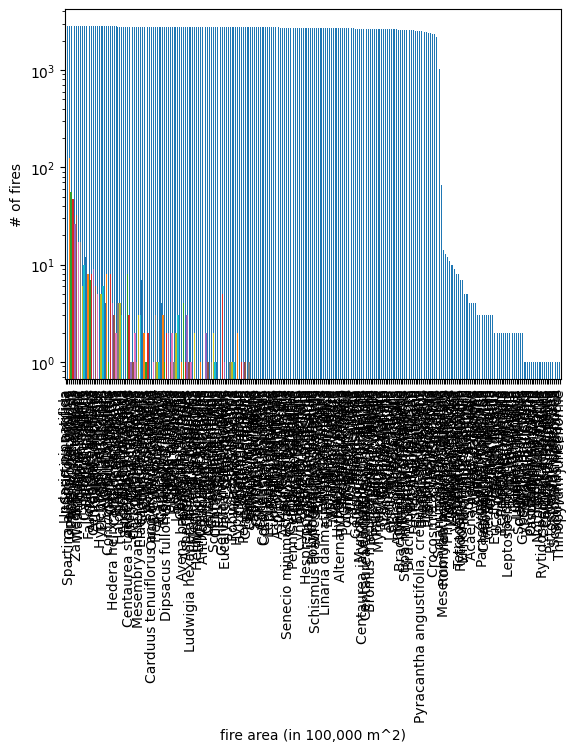

In [49]:
intersection["area"] = intersection.geometry.area

weeds_by_name = weeds['SPECIES'].value_counts()
weeds_by_name.plot(kind = 'bar')

reigons = [i*(100000) for i in range(101)]


for i in range(1, 101):
    plt.bar(i, len(intersection[intersection["area"]<=reigons[i]][intersection["area"]>reigons[i-1]]))
plt.bar(i, len(intersection[intersection["area"]>reigons[-1]]))

plt.xlabel("fire area (in 100,000 m^2)")
plt.ylabel("# of fires")
plt.yscale("log")
plt.show()

In [53]:
#For each weed, if a fire was in a quad and the weed was in a quad, +1
weeds_by_species = weeds[weeds["ABUNDANCE"] > 1].to_crs(intersection.crs)
weeds_by_name = weeds['SPECIES']
weeds_by_name.to_csv('weeds_by_name.csv')


for i in range(len(intersection)):
    weeds_by_species[f"intersects_target {i}"] = weeds_by_species.geometry.intersects(intersection.geometry.iloc[i]).astype(int)

In [31]:
weeds_by_species["fires"] = weeds_by_species[[f"intersects_target {i}" for i in range(len(intersection))]].sum(axis = 1)

# print(sum(weeds_by_species[weeds_by_species["SPECIES_ID"] == 1]["fires"]))

species_fire_count = [sum(weeds_by_species[weeds_by_species["SPECIES_ID"] == i]["fires"]) for i in list(set(weeds_by_species["SPECIES_ID"]))]

In [32]:
species_fire_count[0]

19

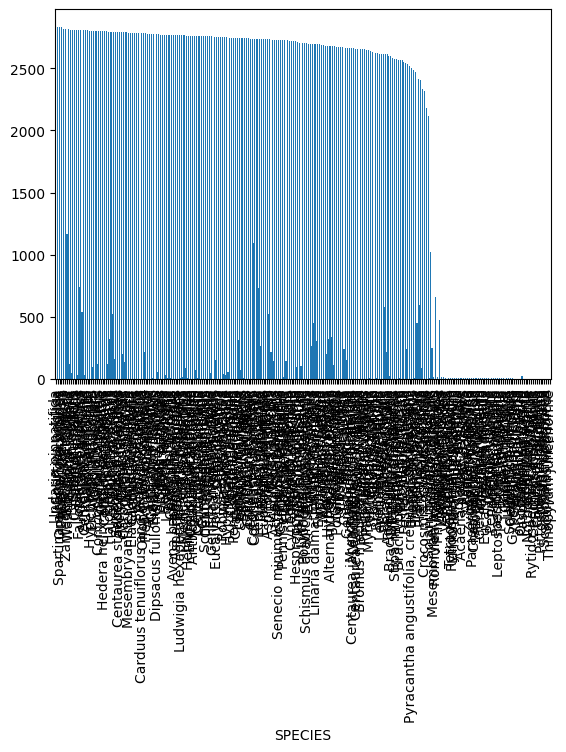

In [54]:
weeds_by_name = weeds['SPECIES'].value_counts()
weeds_by_name.plot(kind='bar')

plt.bar(list(set(weeds_by_species["SPECIES_ID"])), species_fire_count)
plt.show()

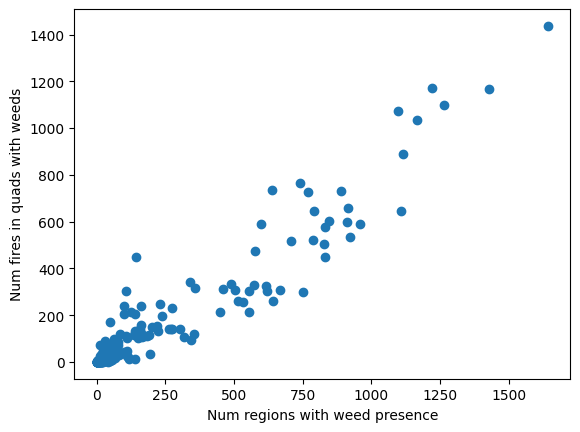

['Rumex crispus',
 'Asphodelus fistulosus',
 'Cytisus scoparius',
 'Olea europaea',
 'Lupinus arboreus',
 'Eichhornia crassipes',
 'Lobularia maritima',
 'Digitalis purpurea',
 'Helichrysum petiolare',
 'Bromus diandrus',
 'Dittrichia graveolens',
 'Nicotiana glauca',
 'Salsola tragus',
 'Onopordum acanthium',
 'Spartium junceum',
 'Centaurea solstitialis',
 'Brachypodium sylvaticum',
 'Acacia melanoxylon',
 'Cotoneaster lacteus',
 'Zantedeschia aethiopica',
 'Anthoxanthum odoratum',
 'Lepidium appelianum',
 'Ehrharta longiflora',
 'Linaria dalmatica ssp. dalmatica',
 'Pyracantha angustifolia, crenulata, seratus, etc.',
 'Saponaria officinalis',
 'Euphorbia terracina',
 'Phragmites australis',
 'Crataegus monogyna',
 'Trifolium hirtum',
 'Pennisetum setaceum',
 'Hirschfeldia incana',
 'Bromus hordeaceus',
 'Arctotheca prostrata',
 'Bromus madritensis ssp. rubens',
 'Myriophyllum spicatum',
 'Watsonia meriana',
 'Echium candicans',
 'Cotula coronopifolia',
 'Cynodon dactylon',
 'Aegilop

In [56]:
plt.scatter(species_quad,species_fire_count)
plt.xlabel("Num regions with weed presence")
plt.ylabel("Num fires in quads with weeds")
plt.show()
list(set(weeds_by_species["SPECIES"]))

In [ ]:
plt.scatter(species_quad,species_fire_count)
plt.xlabel("Num reigons with weed presence")
plt.ylabel("Num fires in quads with weeds")
plt.show()

In [40]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from collections import Counter

warnings.filterwarnings('ignore')

# 1) Load the shapefiles
gdf = gpd.read_file("/quads3310-20131231.shp")
california = gpd.read_file("/CA_State.shp").to_crs(epsg=3857)
fires = gpd.read_file("/Perimeters.shp")
fires = fires[fires.is_valid].to_crs(epsg=3857)

# 2) Extract and clean the “weeds” table
weeds = gdf[['ID', 'SPECIES_ID', 'QUAD_ID', 'ABUNDANCE',
             'SPREAD', 'DATE', 'geometry']]
weeds = weeds[weeds['ABUNDANCE'] != 9]  # Remove unidentified
print(f"Num Species: {weeds['SPECIES_ID'].nunique()}, Num Regions: {weeds['QUAD_ID'].nunique()}")

# 3) Compute “# of quads per species” for abundant weeds
weeds_abund = weeds[weeds['ABUNDANCE'] > 1]
species_quad = weeds_abund.groupby('SPECIES_ID')['QUAD_ID'].nunique()

# 4) Find fires that intersect California
intersection = gpd.sjoin(fires, california, how='inner')
intersection['area'] = intersection.geometry.area

# 5) For each weed‐record, count how many of these fires it falls in
weeds_abund = weeds_abund.to_crs(intersection.crs)
for idx, fire_geom in intersection.geometry.items():
    weeds_abund[f'intersects_{idx}'] = (
        weeds_abund.geometry.intersects(fire_geom).astype(int)
    )
weeds_abund['fires'] = weeds_abund.filter(like='intersects_').sum(axis=1)


# 6) Compute “# of fires per species”
species_fire = weeds_abund.groupby('SPECIES_ID')['fires'].sum()

# 7) Build feature matrix X and label vector y

unique_species = sorted(species_quad.index)
region_counts = np.array([species_quad.loc[s] for s in unique_species])
fire_counts   = np.array([species_fire.loc[s] for s in unique_species])

median_fire = np.median(fire_counts)
y = (fire_counts > median_fire).astype(int)

X = np.column_stack((region_counts, fire_counts))

def euclidean_distance(A, b):
    return np.sqrt(np.sum((A - b)**2, axis=1))

def k_means_clustering(data, k):
    indices = np.random.choice(len(data), size=k, replace=False)
    centroids = [data[i] for i in indices]

    cluster_assignments = [0] * len(data)

    for _ in range(100): # Iterate a fixed number of times
        for i, data_point in enumerate(data):
            distances = [euclidean_distance(data_point, centroid) for centroid in centroids]
            cluster_assignments[i] = np.argmin(distances)

        new_centroids = [np.mean([data[i] for i, assignment in enumerate(cluster_assignments) if assignment == j], axis=0) for j in range(k)]

        if np.all([np.all(old_c == new_c) for old_c, new_c in zip(centroids, new_centroids)]):
            break

        centroids = new_centroids

    clusters = [[] for _ in range(k)]
    for i, assignment in enumerate(cluster_assignments):
        clusters[assignment].append(data[i])

    return clusters

k = 2
clusters = k_means_clustering(data, k)

for i, cluster in enumerate(clusters):
    print(f"Cluster {i + 1}: {cluster}")



Num Species: 265, Num Regions: 2856


NameError: name 'data' is not defined

NameError: name 'k' is not defined

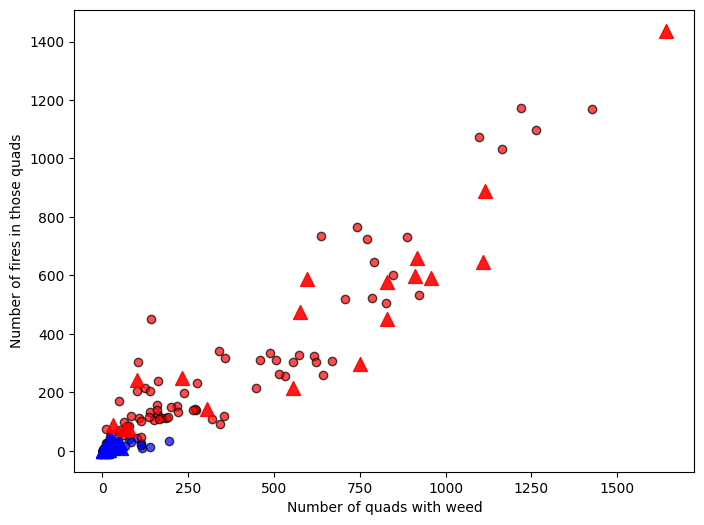

In [38]:
plt.figure(figsize=(8,6))

# Plot TRAINING points, class 0 and 1
for cl, marker in [(0,'o'), (1,'o')]:
    sel = (y_train == cl)
    plt.scatter(
        X_train[sel,0], X_train[sel,1],
        c=['blue','red'][cl],            # blue for 0, red for 1
        marker=marker,
        label=f"Train, class {cl}",
        edgecolor='k', alpha=0.7
    )

# Plot TEST points, class 0 and 1
for cl, marker in [(0,'^'), (1,'^')]:
    sel = (y_pred == cl)
    plt.scatter(
        X_test[sel,0], X_test[sel,1],
        c=['blue','red'][cl],
        marker=marker,
        s=100,
        label=f"Test, class {cl}",
        alpha=0.9
    )

plt.xlabel("Number of quads with weed")
plt.ylabel("Number of fires in those quads")
plt.title(f"kNN classification (k={k})")
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# 7) Define a 4-class label by quartiles of fire_counts
# ───────────────────────────────────────────────
import numpy as np

# compute the 25th, 50th, and 75th percentiles
q1, q2, q3 = np.percentile(fire_counts, [25, 50, 75])

# digitize into 4 bins:
#  0 if fire_counts <= q1
#  1 if q1 < fire_counts <= q2
#  2 if q2 < fire_counts <= q3
#  3 if fire_counts > q3
y4 = np.digitize(fire_counts, bins=[q1, q2, q3])

# now y4 is an array of 0,1,2,3
print("Class distribution:", np.bincount(y4))
X = np.column_stack((region_counts, fire_counts))
y = y4        # <-- use 4-class labels now

# train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# ───────────────────────────────────────────────
# 7) Define a 4-class label by quartiles of fire_counts
# ───────────────────────────────────────────────
import numpy as np

# compute the 25th, 50th, and 75th percentiles
q1, q2, q3 = np.percentile(fire_counts, [25, 50, 75])

# digitize into 4 bins:
#  0 if fire_counts <= q1
#  1 if q1 < fire_counts <= q2
#  2 if q2 < fire_counts <= q3
#  3 if fire_counts > q3
y4 = np.digitize(fire_counts, bins=[q1, q2, q3])

# now y4 is an array of 0,1,2,3
print("Class distribution:", np.bincount(y4))


In [ ]:
X = np.column_stack((region_counts, fire_counts))
y = y4        # <-- use 4-class labels now

# train/test split
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))
for cls in range(4):
    sel_tr = y_train == cls
    sel_te = y_test == cls
    # Get color from tab10 colormap for the current class
    color = plt.cm.tab10(cls)
    plt.scatter(
        X_train[sel_tr, 0],
        X_train[sel_tr, 1],
        label=f"Train class {cls}",
        marker="o",
        color=color,  # Use the color from tab10
        edgecolor="k",
        alpha=0.7,
    )
    plt.scatter(
        X_test[sel_te, 0],
        X_test[sel_te, 1],
        label=f"Test class {cls}",
        marker="^",
        color=color,  # Use the color from tab10
        s=100,
        alpha=0.9,
    )

plt.xlabel("Number of quads with weed")
plt.ylabel("Number of fires in those quads")
plt.title(f"kNN classification (k={k}) — 4 classes")
plt.legend(ncol=2, fontsize="small")
plt.grid(True)
plt.show()

for cls in range(4):
    # Get indices of species in the current class
    indices_in_class = np.where(y == cls)[0]
    # Get the corresponding species IDs using the indices
    species_in_class = [unique_species[i] for i in indices_in_class]
    print(f"Species in class {cls}: {species_in_class}")
